In [1]:
import subprocess
import os
print('Current conda environment:', os.environ['CONDA_DEFAULT_ENV'])
os.environ['TOKENIZERS_PARALLELISM'] = "false"

cwd = os.getcwd()
print(cwd)

import warnings
warnings.filterwarnings('ignore')

import random
random.seed(42)

Current conda environment: reinvent
/home/fts_g_ucla_edu/Projects/rips-relay/experiments


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})

import mols2grid

from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [63]:
features = pd.read_csv('data/features', index_col=0)

In [64]:
features.head()

,QED,# Heteroatoms,Synthetic Complexity,Synthetic Accessibility,Weighted Interaction Similarity,Docking score,RMSD,Interaction Weight Ratio,Model,SMILES,Tanimoto
0,0.351621,9,1507.458087,0.982867,0.866667,-16.624857,3.737471,1.666667,2.0,CCOC(=O)c1c(-c2ccccc2)c2cc(C(F)(F)F)ccc2c(=O)n...,0.514286
1,0.340885,7,1488.314380,0.948534,0.854167,-16.540930,3.676144,1.500000,2.0,COCC(=O)/C=C/c1c(-c2ccccc2)c2cc(Cl)ccc2c(=O)n1...,0.521127
2,0.271819,6,1406.508497,0.910709,0.900000,-16.529593,5.569642,1.600000,2.0,CCC(=O)c1ccc(Cn2c(C(=O)OC)c(-c3ccccc3)c3cc(Cl)...,0.733333
3,0.397044,7,1467.520115,0.945486,0.844444,-16.301600,3.785833,1.551724,2.0,COc1ccc2c(=O)n(Cc3ccc(C(=O)O)cc3)c(/C=C/C(=O)O...,0.438356
4,0.387424,8,1470.935757,0.957991,0.833333,-16.295380,5.360354,1.555556,2.0,CC(=O)c1c(-c2ccccc2)c2cc(C(F)(F)F)ccc2c(=O)n1C...,0.522388


In [65]:
features['Docking score'] = features['Docking score'].abs()

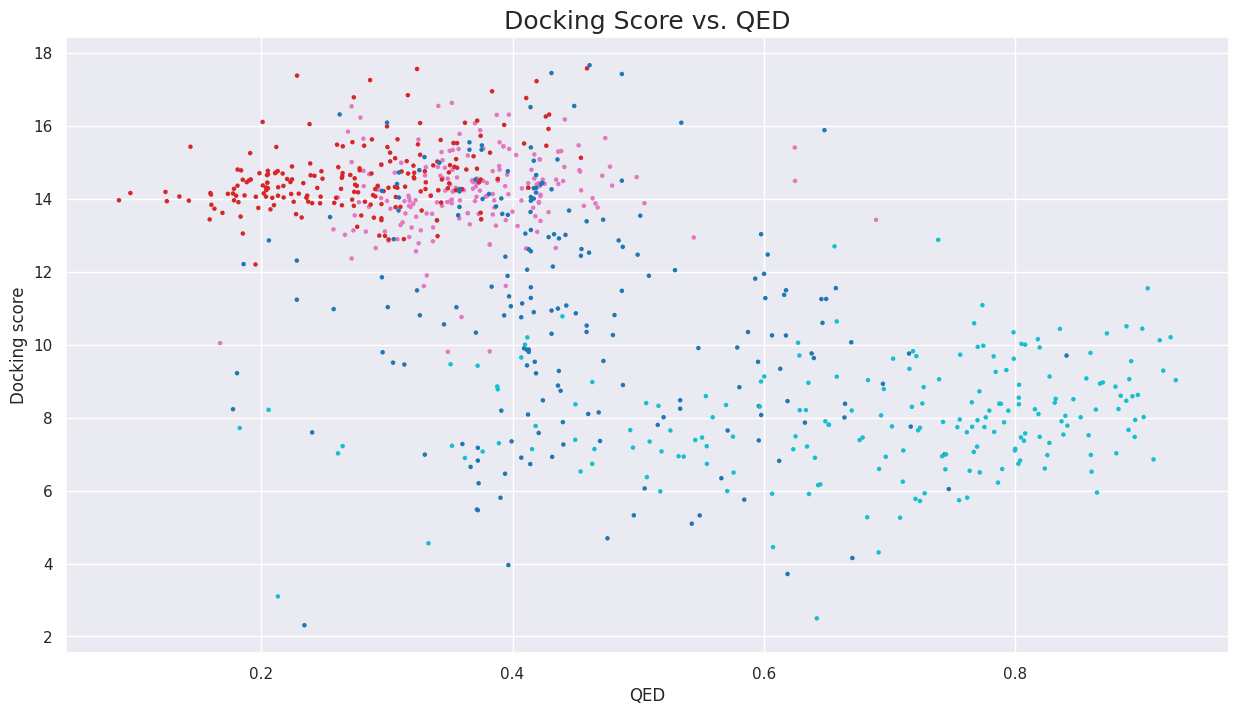

In [66]:
ax = features.plot.scatter(x = 'QED',
                      y = 'Docking score',
                      s=5,
                      c='Model',
                      colormap='tab10',
                      colorbar=False,
                      legend=True)

ax.set_title('Docking Score vs. QED', fontsize=18);

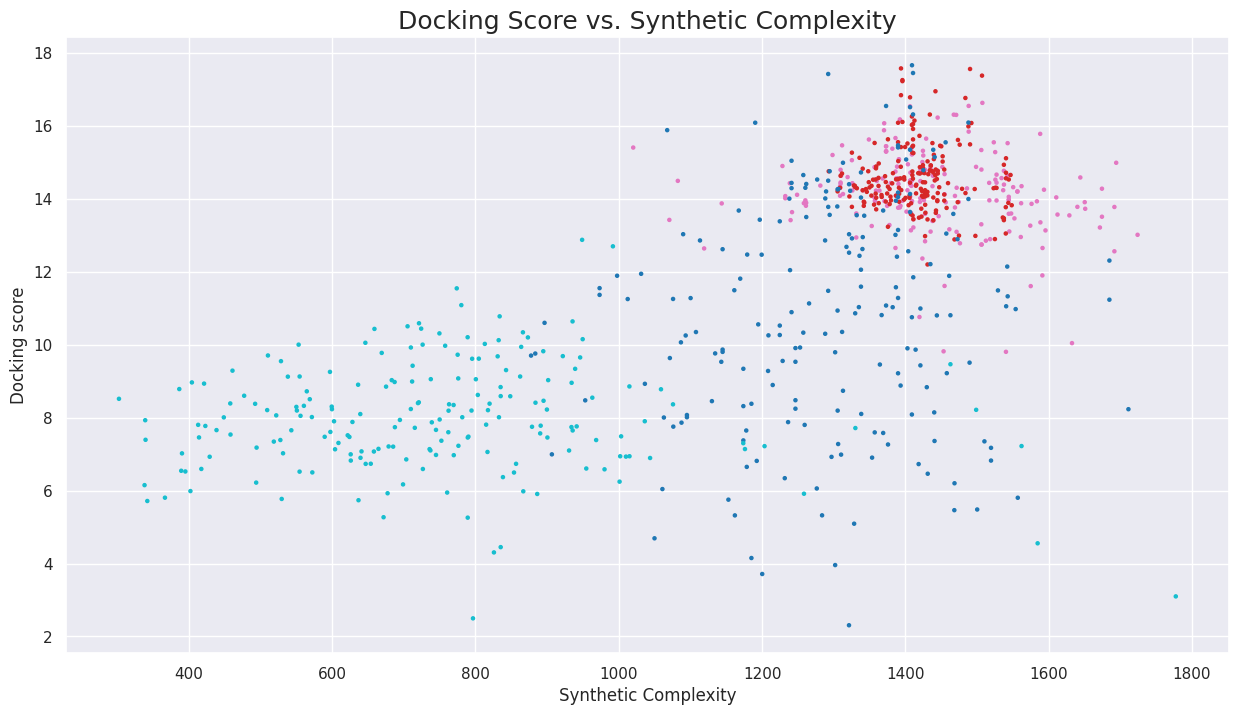

In [67]:
ax = features.plot.scatter(x = 'Synthetic Complexity',
                      y = 'Docking score',
                      s=5,
                      c='Model',
                      colormap='tab10',
                      colorbar=False,
                      legend=True)

ax.set_title('Docking Score vs. Synthetic Complexity', fontsize=18);

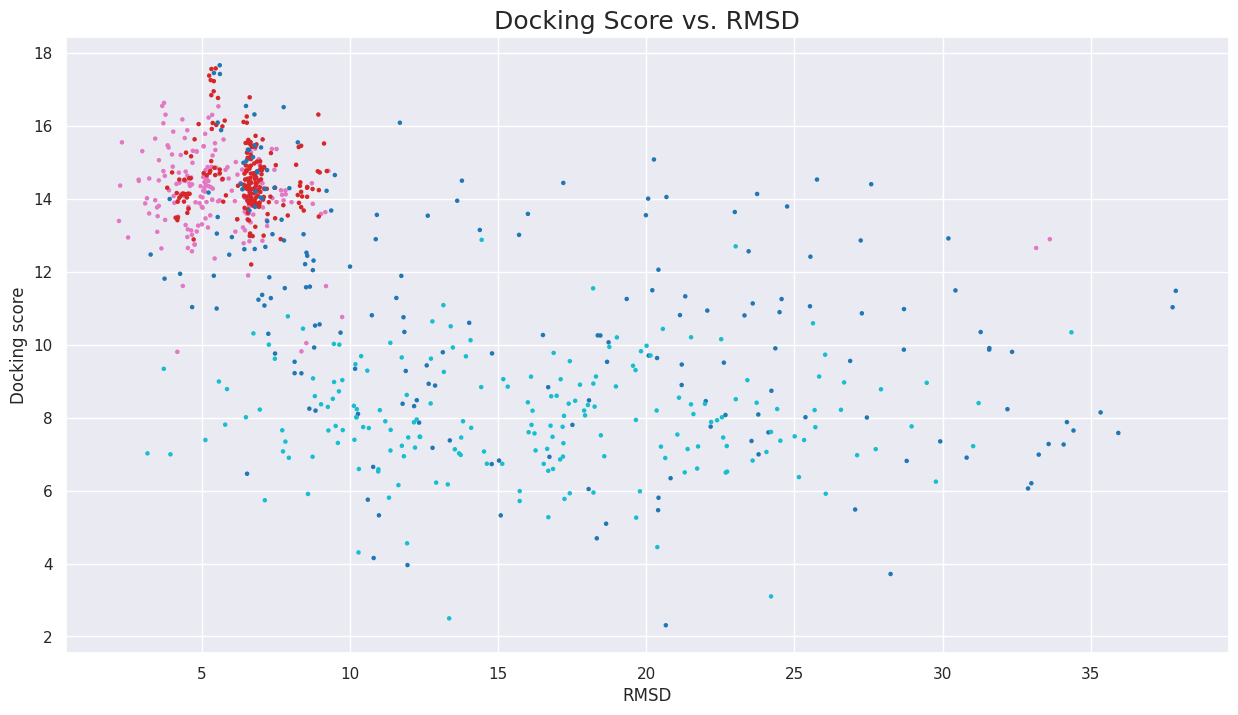

In [68]:
ax = features.plot.scatter(x = 'RMSD',
                      y = 'Docking score',
                      s=5,
                      c='Model',
                      colormap='tab10',
                      colorbar=False,
                      legend=True)

ax.set_title('Docking Score vs. RMSD', fontsize=18);

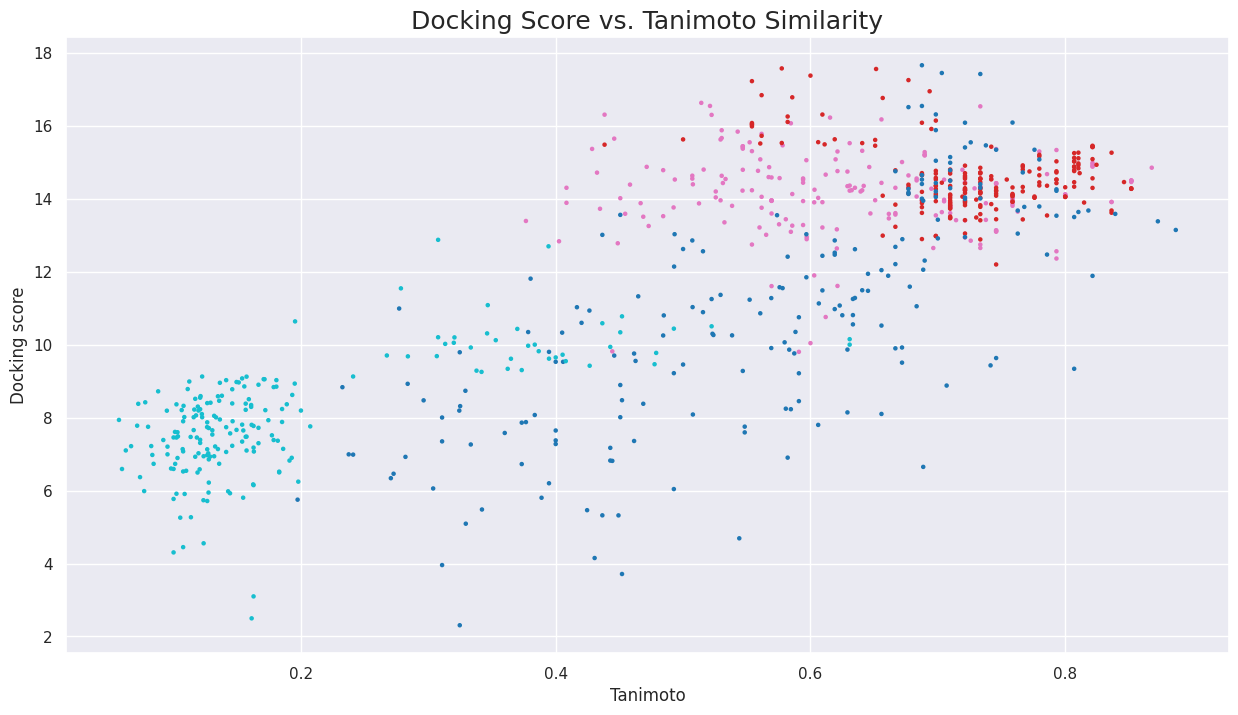

In [69]:
ax = features.plot.scatter(x = 'Tanimoto',
                      y = 'Docking score',
                      s=5,
                      c='Model',
                      colormap='tab10',
                      colorbar=False,
                      legend=True)

ax.set_title('Docking Score vs. Tanimoto Similarity', fontsize=18);

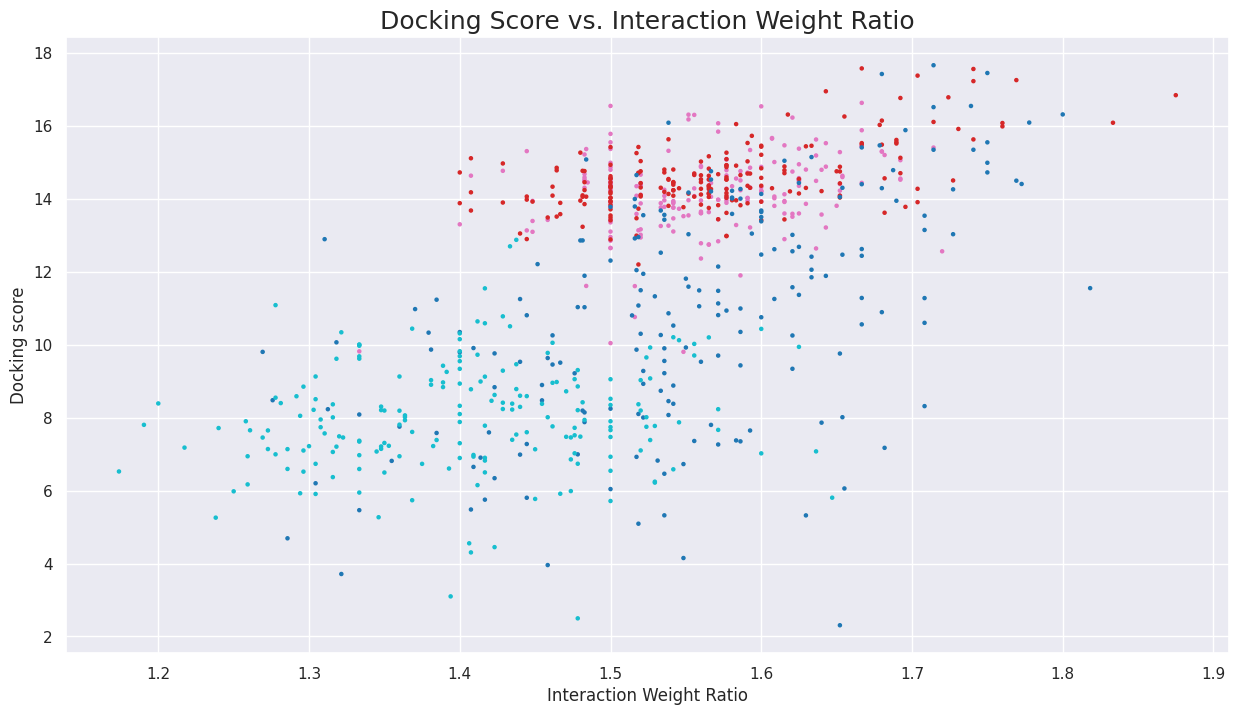

In [70]:
ax = features.plot.scatter(x = 'Interaction Weight Ratio',
                      y = 'Docking score',
                      s=5,
                      c='Model',
                      colormap='tab10',
                      colorbar=False,
                      legend=True)

ax.set_title('Docking Score vs. Interaction Weight Ratio', fontsize=18);

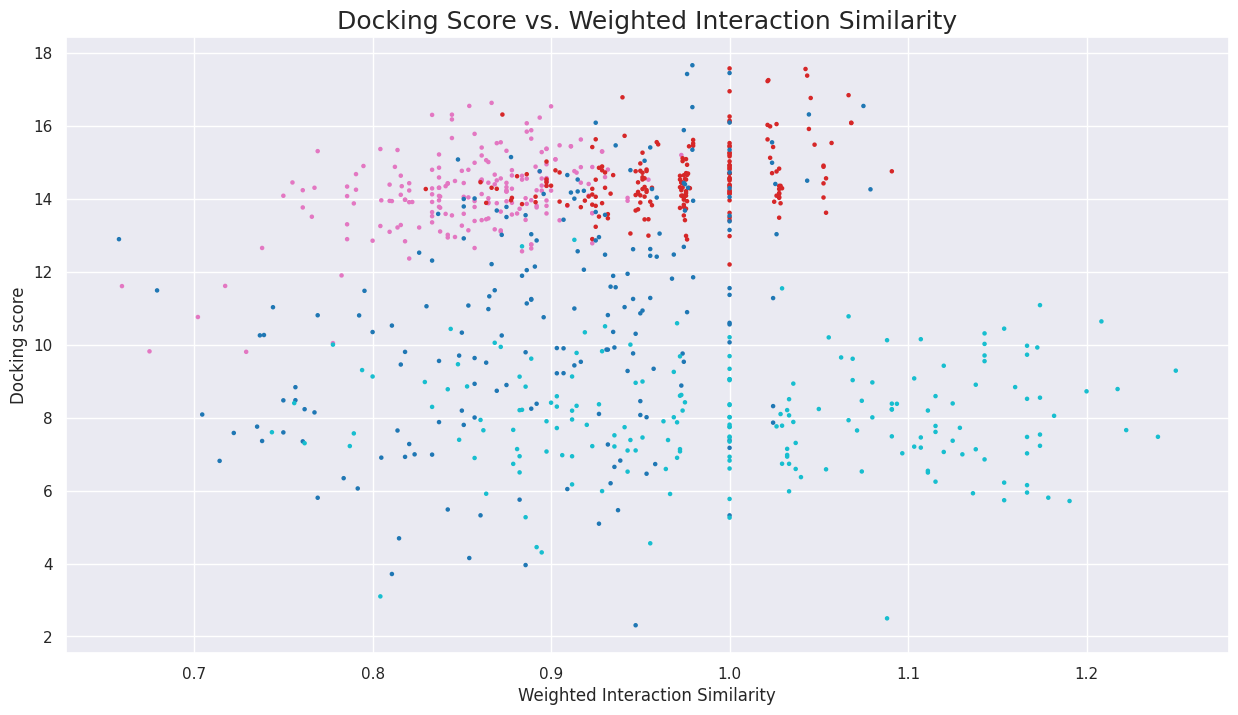

In [71]:
ax = features.plot.scatter(x = 'Weighted Interaction Similarity',
                      y = 'Docking score',
                      s=5,
                      c='Model',
                      colormap='tab10',
                      colorbar=False,
                      legend=True)

ax.set_title('Docking Score vs. Weighted Interaction Similarity', fontsize=18);

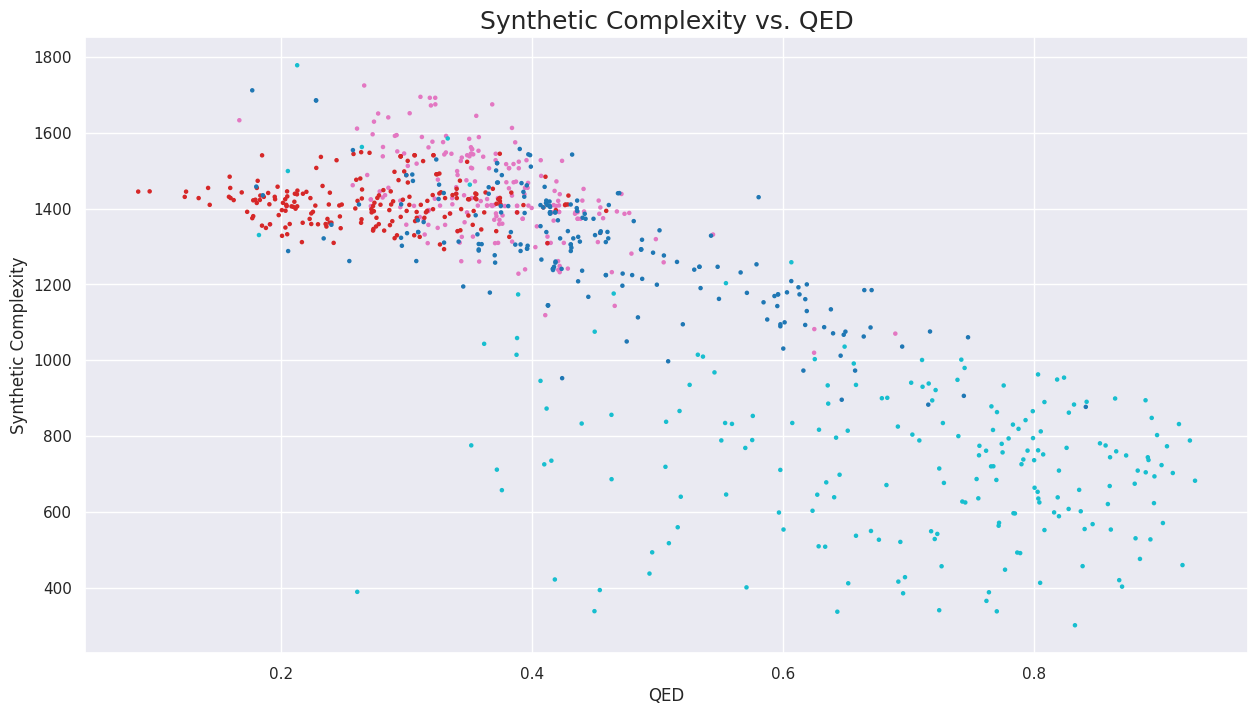

In [72]:
ax = features.plot.scatter(x = 'QED',
                      y = 'Synthetic Complexity',
                      s=5,
                      c='Model',
                      colormap='tab10',
                      colorbar=False,
                      legend=True)

ax.set_title('Synthetic Complexity vs. QED', fontsize=18);

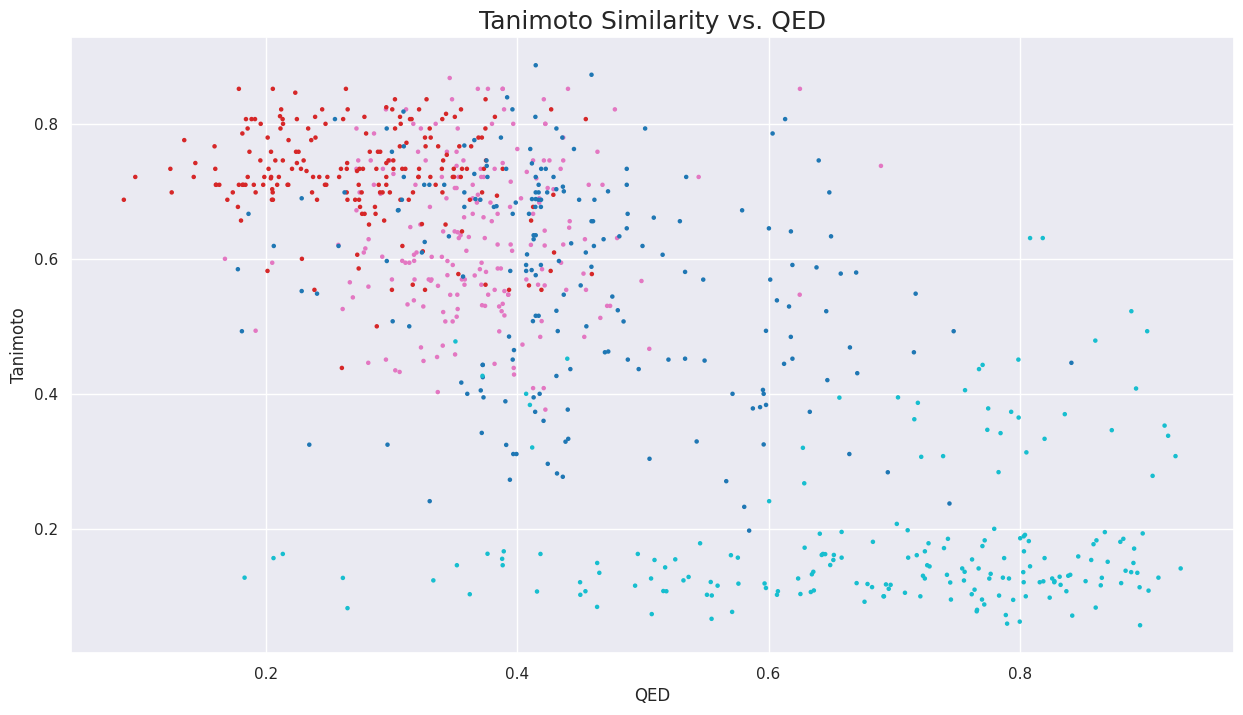

In [78]:
ax = features.plot.scatter(x = 'QED',
                      y = 'Tanimoto',
                      s=5,
                      c='Model',
                      colormap='tab10',
                      colorbar=False,
                      legend=True)

ax.set_title('Tanimoto Similarity vs. QED', fontsize=18);

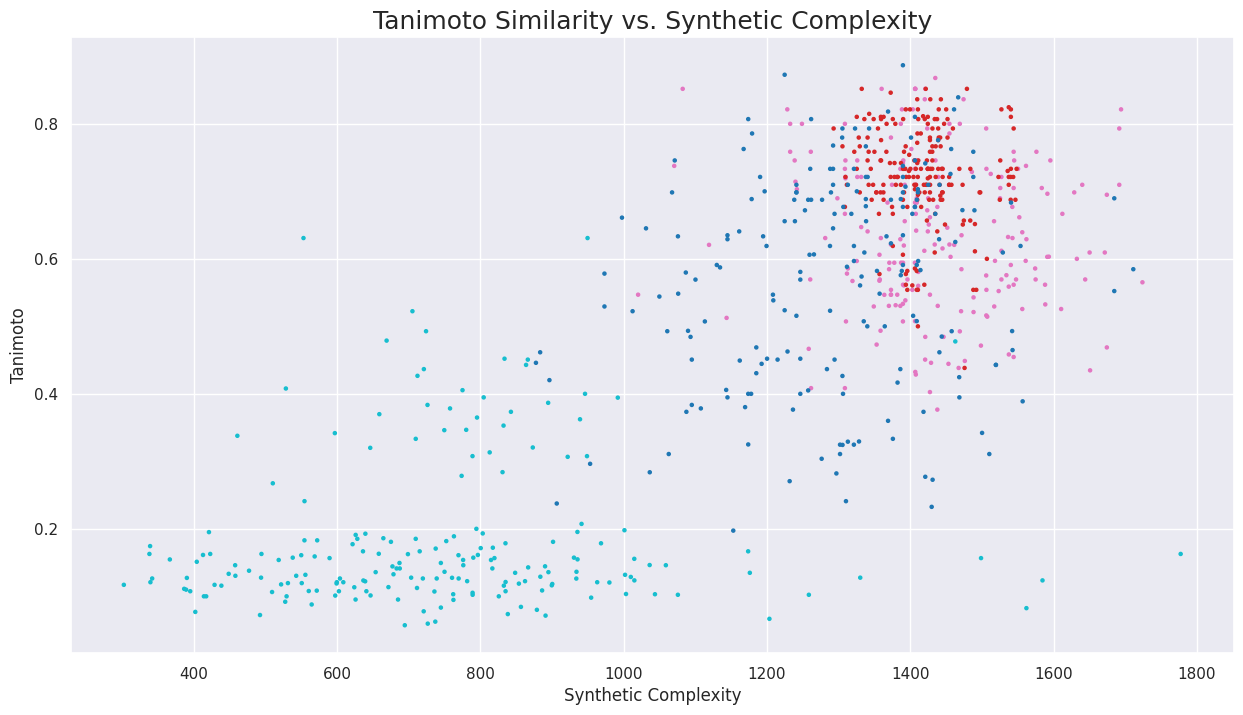

In [74]:
ax = features.plot.scatter(x = 'Synthetic Complexity',
                      y = 'Tanimoto',
                      s=5,
                      c='Model',
                      colormap='tab10',
                      colorbar=False,
                      legend=True)

ax.set_title('Tanimoto Similarity vs. Synthetic Complexity', fontsize=18);